# Visualización funciones de activación 
Bibliografía consultada a fecha de 9-02-2022: 
- Uso de notebook: https://datatofish.com/add-julia-to-jupyter/
- Cómo visualizar funciones en julia: https://docs.juliaplots.org/latest/tutorial/ 
- Definir funciones: https://docs.julialang.org/en/v1/manual/functions/
- Sobre tipos: https://docs.julialang.org/en/v1/manual/types/

In [11]:
# Paquetes
using Plots
using GR
img_path = "../doc/img/articulo_rrnn_aproximadores_universales/"

"../doc/img/articulo_rrnn_aproximadores_universales/"

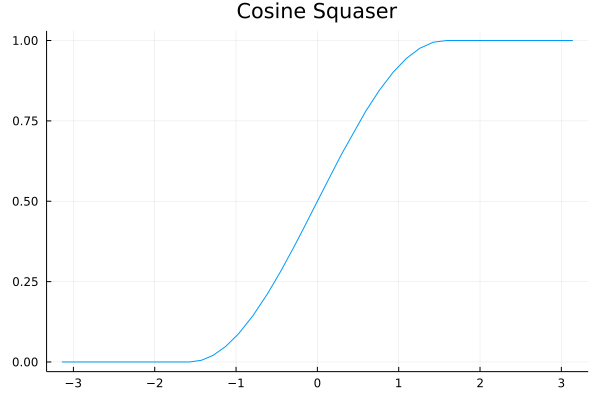

In [27]:
function CosineSquaser(x::Real) :: Real
    salida = 1
    if x < - pi/2 
        salida =  0
    elseif x <=  pi/2 
        salida =  1/2 * (1 + cos( x - pi/2))
    end
    return salida
end

display(plot( CosineSquaser, -pi, pi, title="Cosine Squaser", label=""))
savefig(img_path*"cosineSquaser.png") 

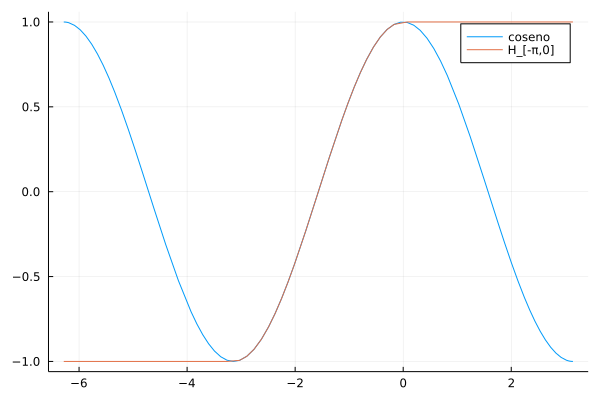

In [26]:
# Tramo en el que son iguales
F = CosineSquaser
plot(cos, -pi*2,pi ,label="coseno")
F_1(x) = 2*F(x+pi/2)- F(x + 1000)  # 1000 = 2 pi M
display(plot!(F_1, -pi*2,pi, label= "H_[-π,0] "))
savefig(img_path*"H_menos_pi_0.png") 

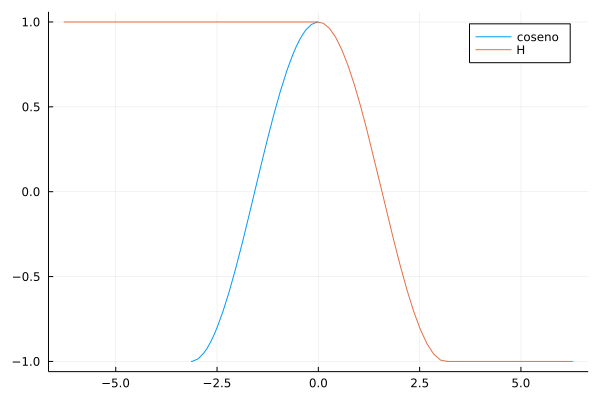

In [25]:
# Tramo simétrico 
F_2(x) = F_1(-x )

plot(cos, -pi,0 ,label="coseno")
display(plot!(F_2, -2*pi, 2*pi, label= "H"))
savefig(img_path*"H_menos_pi_0.png")

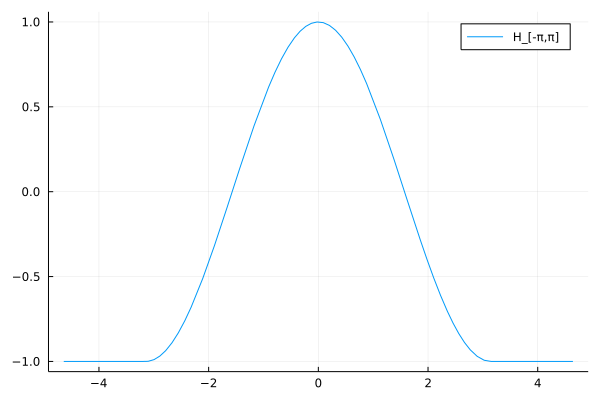

In [24]:
F_3(x) = (F_1(x) + F_2(x))-1
display(plot(F_3, -pi -1.5, pi + 1.5, label=" H_[-π,π]"))
savefig(img_path*"H_menos_pi_mas_pi.png") 


Caso N=1


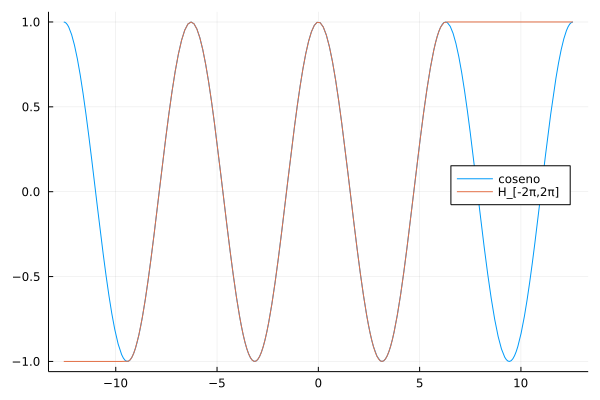

Caso N=2


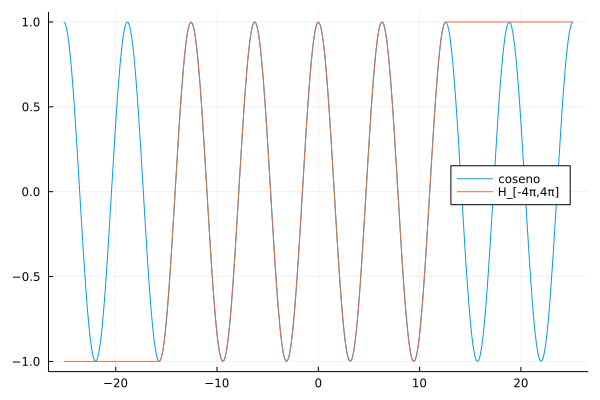

Caso N=4


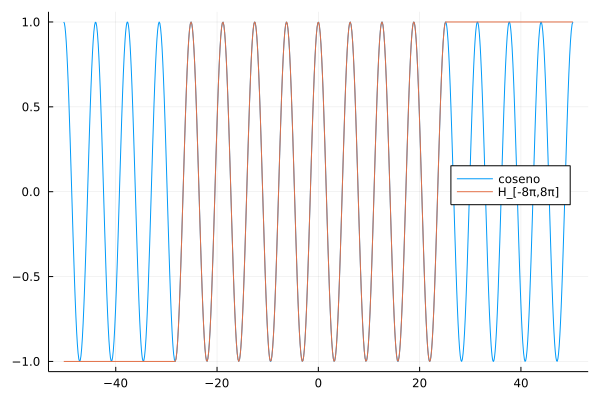

In [29]:
# Función genérica 
function CosineSquaser(x::Real) :: Real
    salida = 1
    if x < - pi/2 
        salida =  0
    elseif x <=  pi/2 
        salida =  1/2 * (1 + cos( x - pi/2))
    end
    return salida
end
F = CosineSquaser
F_1(x) = 2*F(x+pi/2)- 1 # H_[-π,0]
F_2(x) = F_1(-x )       # H_[0, π]
F_3(x) = (F_1(x) + F_2(x))-1 # H_[-π,π]

function CosenoPropio(N)
    function f(x)
        resultado = F_1(x) 
        for i = 1:N
            resultado  +=  F_3(x + 2*pi*i) - F_3(- x + 2*pi*i -pi)
            
        end
        return resultado
    end
    return f
end


for N in [1,2,4]
    println("Caso N=$(N)")
    flush(stdout)
    n = 2*N
    M = 2*n*pi
    f_label = "H_[-$(n)π,$(n)π]"
    plot(cos, -M,M ,label="coseno")
    display(plot!(CosenoPropio(N), -M, M, label=f_label, legend=:right))#:bottomright))
    savefig(img_path*f_label*".png") 
end 
